In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:

import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
tf.set_random_seed(777)
from sklearn.preprocessing import MinMaxScaler

In [3]:
Data = pd.read_excel('raw.xlsx') # import Data
First_cut = Data.drop("ID",1)
Cut = np.array(First_cut)

In [4]:
# ID 정리
ID = Data['ID']
ID = list(ID)
DID = []
for i in ID:
    for j in range(0,8): # 8개년도
        DID.append(i)

#균열율 정리
crack = Cut[0:96,0:8]
Dcrack = []
for i in crack:
    for j in i:
        Dcrack.append(j)
#수정 총 교통량 정리
AADT = Cut[0:96,8:16]
DAADT = []
for i in AADT:
    for j in i:
        DAADT.append(j)
#수정 ESAL 정리
ESAL = Cut[0:96,16:24]
DESAL = []
for i in ESAL:
    for j in i:
        DESAL.append(j)
#평균기온 정리
Temp = Cut[0:96,24:32]
DTemp = []
for i in Temp:
    for j in i:
        DTemp.append(j)

#평균강수량 정리
Rain = Cut[0:96,32:40]
DRain = []
for i in Rain:
    for j in i:
        DRain.append(j)
        
#평균기온 정리
Snow = Cut[0:96,40:48]
DSnow = []
for i in Snow:
    for j in i:
        DSnow.append(j)

#평균기온 정리
MaxtemEver = Cut[0:96,48:56]
DMaxtemEver = []
for i in MaxtemEver:
    for j in i:
        DMaxtemEver.append(j)

#평균기온 정리
Maxtem = Cut[0:96,56:64]
DMaxtem = []
for i in Maxtem:
    for j in i:
        DMaxtem.append(j)
        
#평균기온 정리
LowtemEver = Cut[0:96,64:72]
DLowtemEver = []
for i in LowtemEver:
    for j in i:
        DLowtemEver.append(j)
        
#평균기온 정리
Lowtem = Cut[0:96,72:80]
DLowtem = []
for i in Lowtem:
    for j in i:
        DLowtem.append(j)
        
#평균기온 정리
Wet = Cut[0:96,80:88]
DWet = []
for i in Wet:
    for j in i:
        DWet.append(j)
        
#평균기온 정리
Sunny = Cut[0:96,88:96]
DSunny = []
for i in Sunny:
    for j in i:
        DSunny.append(j)

#평균기온 정리
BZ = Cut[0:96,96:104]
DBZ = []
for i in BZ:
    for j in i:
        DBZ.append(j)   

In [5]:
Df = pd.DataFrame(data={'ID':DID,'Crack' : Dcrack, 'AADT': DAADT, 'ESAL' : DESAL, 'Temp': DTemp, 'Rain' : DRain, 'Snow' : DSnow
                        , 'MaxtemEver' : DMaxtemEver,'Maxtem' : DMaxtem, 'LowtemEver' : DLowtemEver, 'Lowtem' : DLowtem, 'Wet' : DWet, 'Sunny' : DSunny, 'BZ' : DBZ})
Df
Df.to_csv('data1.csv')

In [6]:
Second_cut = Df.drop("ID",1)
second_ID = Df['ID']
second_ID

0      101
1      101
2      101
3      101
4      101
5      101
6      101
7      101
8      102
9      102
10     102
11     102
12     102
13     102
14     102
15     102
16     104
17     104
18     104
19     104
20     104
21     104
22     104
23     104
24     106
25     106
26     106
27     106
28     106
29     106
      ... 
738    326
739    326
740    326
741    326
742    326
743    326
744    327
745    327
746    327
747    327
748    327
749    327
750    327
751    327
752    328
753    328
754    328
755    328
756    328
757    328
758    328
759    328
760    332
761    332
762    332
763    332
764    332
765    332
766    332
767    332
Name: ID, Length: 768, dtype: int64

In [7]:
Df1 = np.array(Second_cut)
print(Df1)


[[1.15791429e+01 7.97500000e+03 1.20940000e+03 ... 6.70000000e+01
  1.85650000e+04 4.80000000e+01]
 [1.19265171e+01 7.74500000e+03 1.59160000e+03 ... 6.80000000e+01
  2.13710000e+04 3.90000000e+01]
 [5.18914286e+00 7.75300000e+03 1.53920000e+03 ... 6.70000000e+01
  2.08710000e+04 4.10000000e+01]
 ...
 [1.87000000e+00 3.90600000e+03 6.60200000e+02 ... 6.50000000e+01
  2.23960000e+04 4.90000000e+01]
 [2.02000000e+00 4.33600000e+03 5.03000000e+02 ... 6.00000000e+01
  2.45240000e+04 3.30000000e+01]
 [2.56000000e+00 6.07500000e+03 7.04733625e+02 ... 6.40000000e+01
  2.31160000e+04 4.20000000e+01]]


In [8]:
for i in range(96):
    targetstart = i * 8
    targetend = targetstart + 8
    cutting = Df1[targetstart : targetend, 0 : 13]
    cutting = pd.DataFrame(cutting)
    
    if i == 0 :
        Fulldata = cutting
    else:
        Fulldata = pd.concat([Fulldata, cutting],axis=1)
        
Fulldata = np.array(Fulldata)

In [9]:
DIID = []
for i in ID:
    for j in range(0,13): 
        DIID.append(i)
COLL = ['Crack', 'AADT', 'ESAL', 'Temp', 'Rain', 'Snow', 'MaxtemEver','Maxtem', 'LowtemEver', 'Lowtem', 'Wet', 'Sunny', 'BZ' ]
COLL= COLL * 96
DIID = np.array(DIID)
COLL = np.array(COLL)
print(np.shape(DIID))
print(np.shape(COLL))
print(np.shape(Fulldata))

(1248,)
(1248,)
(8, 1248)


In [10]:
df3 = pd.DataFrame(Fulldata , columns=[DIID, COLL])

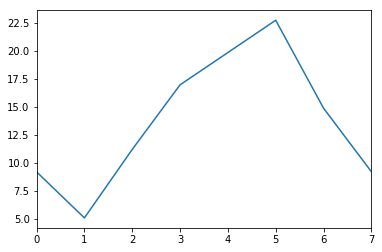

In [11]:
df3[104]['Snow'].plot()

In [12]:
DATA = df3
DATA

101                                                                   \
       Crack    AADT        ESAL   Temp     Rain       Snow MaxtemEver Maxtem   
0  11.579143  7975.0  1209.40000  115.0  12863.0   9.200000      180.0  343.0   
1  11.926517  7745.0  1591.60000  117.0  15182.0   5.100000      182.0  352.0   
2   5.189143  7753.0  1539.20000  117.0  15278.0  11.200000      179.0  341.0   
3  10.303714  7242.0  1460.60000  109.0  19395.0  16.951439      167.0  330.0   
4  11.206286  7341.0   321.90000  107.0  23112.0  19.827159      168.0  352.0   
5  10.470000  7057.0   566.00000  110.0  13839.0  22.702878      174.0  364.0   
6  11.010000  7315.0   478.70000  114.0  14709.0  14.870671      175.0  343.0   
7  11.090000  7384.0   483.21542  121.0   7416.0   9.217128      187.0  363.0   

                     ...    332                                       \
  LowtemEver Lowtem  ...   Temp     Rain      Snow MaxtemEver Maxtem   
0       66.0 -138.0  ...  147.0  12414.0  0.100000      190.0  360.0   
1       66.0 -152.0  ...  141.0   8854.0  0.100000      184.0  356.0   
2       67.0 -150.0  ...  148.0   8855.0  0.300000      191.0  353.0   
3       62.0 -195.0  ...  146.0   9274.0  4.025492      188.0  357.0   
4       59.0 -191.0  ...  143.0  10899.0  5.888238      185.0  351.0   
5       60.0 -197.0  ...  141.0  13337.0  7.750984      182.0  368.0   
6       64.0 -207.0  ...  149.0   9052.0  8.078248      194.0  376.0   
7       69.0 -156.0  ...  146.0  13380.0  8.064359      187.0  360.0   

                                          
  LowtemEver Lowtem   Wet    Sunny    BZ  
0      111.0  -49.0  66.0  20626.0  47.0  
1      105.0  -83.0  65.0  23051.0  39.0  
2      112.0  -88.0  63.0  22699.0  41.0  
3      109.0  -87.0  65.0  22621.0  39.0  
4      108.0 -127.0  63.0  21936.0  48.0  
5      106.0 -115.0  65.0  22396.0  49.0  
6      110.0 -123.0  60.0  24524.0  33.0  
7      109.0  -83.0  64.0  23116.0  42.0  

[8 rows x 1248 columns]

In [13]:
row = DATA.T.iloc[0,:].values

In [14]:
print(row)

[11.57914286 11.92651714  5.18914286 10.30371429 11.20628571 10.47
 11.01       11.09      ]


In [15]:
y_test_mean = []
y_pred_mean = []

for i in ID:
    a = DATA[i]
    a = a.T
    print(i,"번째 출력입니다.")
    print(a)
    

101 번째 출력입니다.
                       0             1             2             3  \
Crack          11.579143     11.926517      5.189143     10.303714   
AADT         7975.000000   7745.000000   7753.000000   7242.000000   
ESAL         1209.400000   1591.600000   1539.200000   1460.600000   
Temp          115.000000    117.000000    117.000000    109.000000   
Rain        12863.000000  15182.000000  15278.000000  19395.000000   
Snow            9.200000      5.100000     11.200000     16.951439   
MaxtemEver    180.000000    182.000000    179.000000    167.000000   
Maxtem        343.000000    352.000000    341.000000    330.000000   
LowtemEver     66.000000     66.000000     67.000000     62.000000   
Lowtem       -138.000000   -152.000000   -150.000000   -195.000000   
Wet            67.000000     68.000000     67.000000     67.000000   
Sunny       18565.000000  21371.000000  20871.000000  18459.000000   
BZ             48.000000     39.000000     41.000000     56.000000   

     

                  0             1             2             3             4  \
Crack           2.7      1.362857      0.007714      0.756000      0.858857   
AADT         8674.0   9058.000000   8652.000000   9923.000000  11932.000000   
ESAL         1176.1   1358.400000   1104.800000   2192.400000   1403.400000   
Temp          146.0    145.000000    146.000000    143.000000    140.000000   
Rain        15124.0   9598.000000  12477.000000  17331.000000  16504.000000   
Snow            0.7      3.000000      2.100000      3.028615      3.492922   
MaxtemEver    178.0    179.000000    179.000000    175.000000    173.000000   
Maxtem        337.0    319.000000    312.000000    325.000000    324.000000   
LowtemEver    120.0    119.000000    118.000000    115.000000    113.000000   
Lowtem        -40.0    -73.000000    -74.000000    -74.000000   -104.000000   
Wet            65.0     63.000000     63.000000     66.000000     64.000000   
Sunny       21537.0  22797.000000  22771.000000  219

                       0             1        2             3             4  \
Crack           1.298571      1.262571      0.9      1.820571      2.206286   
AADT         3704.000000   3434.000000   4257.0   4666.000000   4731.000000   
ESAL          317.300000    403.100000    754.4    448.900000    973.800000   
Temp          146.000000    145.000000    146.0    143.000000    140.000000   
Rain        15124.000000   9598.000000  12477.0  17331.000000  16504.000000   
Snow            0.700000      3.000000      2.1      3.028615      3.492922   
MaxtemEver    178.000000    179.000000    179.0    175.000000    173.000000   
Maxtem        337.000000    319.000000    312.0    325.000000    324.000000   
LowtemEver    120.000000    119.000000    118.0    115.000000    113.000000   
Lowtem        -40.000000    -73.000000    -74.0    -74.000000   -104.000000   
Wet            65.000000     63.000000     63.0     66.000000     64.000000   
Sunny       21537.000000  22797.000000  22771.0  219

In [40]:

# train Parameters
seq_length = 1
data_dim = 13
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 5000


xy = DATA[101]


# train/test split
train_size = int(len(xy) * 0.9)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each


In [41]:
test_set

,Crack,AADT,ESAL,Temp,Rain,Snow,MaxtemEver,Maxtem,LowtemEver,Lowtem,Wet,Sunny,BZ
6,11.01,7315.0,478.70000,114.0,14709.0,14.870671,175.0,343.0,64.0,-207.0,67.0,23982.0,44.0
7,11.09,7384.0,483.21542,121.0,7416.0,9.217128,187.0,363.0,69.0,-156.0,64.0,24180.0,28.0


In [42]:
train_set = np.array(train_set)
test_set = np.array(test_set)

In [43]:
print(train_set)
print(test_set)

[[ 1.15791429e+01  7.97500000e+03  1.20940000e+03  1.15000000e+02
   1.28630000e+04  9.20000000e+00  1.80000000e+02  3.43000000e+02
   6.60000000e+01 -1.38000000e+02  6.70000000e+01  1.85650000e+04
   4.80000000e+01]
 [ 1.19265171e+01  7.74500000e+03  1.59160000e+03  1.17000000e+02
   1.51820000e+04  5.10000000e+00  1.82000000e+02  3.52000000e+02
   6.60000000e+01 -1.52000000e+02  6.80000000e+01  2.13710000e+04
   3.90000000e+01]
 [ 5.18914286e+00  7.75300000e+03  1.53920000e+03  1.17000000e+02
   1.52780000e+04  1.12000000e+01  1.79000000e+02  3.41000000e+02
   6.70000000e+01 -1.50000000e+02  6.70000000e+01  2.08710000e+04
   4.10000000e+01]
 [ 1.03037143e+01  7.24200000e+03  1.46060000e+03  1.09000000e+02
   1.93950000e+04  1.69514391e+01  1.67000000e+02  3.30000000e+02
   6.20000000e+01 -1.95000000e+02  6.70000000e+01  1.84590000e+04
   5.60000000e+01]
 [ 1.12062857e+01  7.34100000e+03  3.21900000e+02  1.07000000e+02
   2.31120000e+04  1.98271586e+01  1.68000000e+02  3.52000000e+02


In [44]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [0]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[ 1.15791429e+01  7.97500000e+03  1.20940000e+03  1.15000000e+02
   1.28630000e+04  9.20000000e+00  1.80000000e+02  3.43000000e+02
   6.60000000e+01 -1.38000000e+02  6.70000000e+01  1.85650000e+04
   4.80000000e+01]] -> [11.92651714]
[[ 1.19265171e+01  7.74500000e+03  1.59160000e+03  1.17000000e+02
   1.51820000e+04  5.10000000e+00  1.82000000e+02  3.52000000e+02
   6.60000000e+01 -1.52000000e+02  6.80000000e+01  2.13710000e+04
   3.90000000e+01]] -> [5.18914286]
[[ 5.18914286e+00  7.75300000e+03  1.53920000e+03  1.17000000e+02
   1.52780000e+04  1.12000000e+01  1.79000000e+02  3.41000000e+02
   6.70000000e+01 -1.50000000e+02  6.70000000e+01  2.08710000e+04
   4.10000000e+01]] -> [10.30371429]
[[ 1.03037143e+01  7.24200000e+03  1.46060000e+03  1.09000000e+02
   1.93950000e+04  1.69514391e+01  1.67000000e+02  3.30000000e+02
   6.20000000e+01 -1.95000000e+02  6.70000000e+01  1.84590000e+04
   5.60000000e+01]] -> [11.20628571]
[[ 1.12062857e+01  7.34100000e+03  3.21900000e+02  1.07000000

In [45]:
trainX

array([[[ 1.15791429e+01,  7.97500000e+03,  1.20940000e+03,
          1.15000000e+02,  1.28630000e+04,  9.20000000e+00,
          1.80000000e+02,  3.43000000e+02,  6.60000000e+01,
         -1.38000000e+02,  6.70000000e+01,  1.85650000e+04,
          4.80000000e+01]],

       [[ 1.19265171e+01,  7.74500000e+03,  1.59160000e+03,
          1.17000000e+02,  1.51820000e+04,  5.10000000e+00,
          1.82000000e+02,  3.52000000e+02,  6.60000000e+01,
         -1.52000000e+02,  6.80000000e+01,  2.13710000e+04,
          3.90000000e+01]],

       [[ 5.18914286e+00,  7.75300000e+03,  1.53920000e+03,
          1.17000000e+02,  1.52780000e+04,  1.12000000e+01,
          1.79000000e+02,  3.41000000e+02,  6.70000000e+01,
         -1.50000000e+02,  6.70000000e+01,  2.08710000e+04,
          4.10000000e+01]],

       [[ 1.03037143e+01,  7.24200000e+03,  1.46060000e+03,
          1.09000000e+02,  1.93950000e+04,  1.69514391e+01,
          1.67000000e+02,  3.30000000e+02,  6.20000000e+01,
         -1.9

In [46]:
testY

array([[11.09]])

In [47]:
trainY

array([[11.92651714],
       [ 5.18914286],
       [10.30371429],
       [11.20628571],
       [10.47      ],
       [11.01      ]])

In [55]:
a = len(ID)
print(a)

96


In [48]:
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [64]:
id_name = []
y_test_mean = []
y_pred_mean = []
rrmmssee = []
for i in ID :
    tf.reset_default_graph()
    xy = DATA[i]
    train_size = int(len(xy) * 0.8)
    train_set = xy[0:train_size]
    test_set = xy[train_size - seq_length:]
    train_set = np.array(train_set)
    test_set = np.array(test_set)
    id_name.append(i)

    
    def build_dataset(time_series, seq_length):
        dataX = []
        dataY = []
        for i in range(0, len(time_series) - seq_length):
            _x = time_series[i:i + seq_length, :]
            _y = time_series[i + seq_length, [0]]  # Next close price
            
            dataX.append(_x)
            dataY.append(_y)
        return np.array(dataX), np.array(dataY)

    trainX, trainY = build_dataset(train_set, seq_length)
    testX, testY = build_dataset(test_set, seq_length)
    X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
    Y = tf.placeholder(tf.float32, [None, 1])

    # build a LSTM network
    
    with tf.variable_scope('re',reuse=tf.AUTO_REUSE):
        cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
        outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    Y_pred = tf.contrib.layers.fully_connected(
        outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

    # cost/loss
    loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
    # optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(loss)

    # RMSE
    targets = tf.placeholder(tf.float32, [None, 1])
    predictions = tf.placeholder(tf.float32, [None, 1])
    rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)

        # Training step
        for i in range(iterations):
            _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        
        # Test step
        test_predict = sess.run(Y_pred, feed_dict={X: testX})
        rmse_val = sess.run(rmse, feed_dict={
                        targets: testY, predictions: test_predict})
        
        
        
        rrmmssee.append(rmse_val)
        y_pred_mean.append(test_predict)
        y_test_mean.append(testY)
        
        
        print("RMSE: {}".format(rmse_val))
    
    print((len(rrmmssee) / len(ID) * 100), "% 완료 했습니다.")
    

RMSE: 5.328079700469971
1.0416666666666665 % 완료 했습니다.
RMSE: 1.931066870689392
2.083333333333333 % 완료 했습니다.
RMSE: 4.750375270843506
3.125 % 완료 했습니다.
RMSE: 9.501115798950195
4.166666666666666 % 완료 했습니다.
RMSE: 18.599946975708008
5.208333333333334 % 완료 했습니다.
RMSE: 0.29602980613708496
6.25 % 완료 했습니다.
RMSE: 2.432319164276123
7.291666666666667 % 완료 했습니다.
RMSE: 2.690282106399536
8.333333333333332 % 완료 했습니다.
RMSE: 2.5490822792053223
9.375 % 완료 했습니다.
RMSE: 0.502936065196991
10.416666666666668 % 완료 했습니다.
RMSE: 54.874107360839844
11.458333333333332 % 완료 했습니다.
RMSE: 4.606425762176514
12.5 % 완료 했습니다.
RMSE: 2.932403087615967
13.541666666666666 % 완료 했습니다.
RMSE: 1.1143673658370972
14.583333333333334 % 완료 했습니다.
RMSE: 1.0394344329833984
15.625 % 완료 했습니다.
RMSE: 1.292526125907898
16.666666666666664 % 완료 했습니다.
RMSE: 0.7619876265525818
17.708333333333336 % 완료 했습니다.
RMSE: 12.856213569641113
18.75 % 완료 했습니다.
RMSE: 15.148696899414062
19.791666666666664 % 완료 했습니다.
RMSE: 1.156325101852417
20.833333333333336 % 완료 

In [72]:
print(rrmmssee)
print(y_pred_mean)

[5.3280797, 1.9310669, 4.7503753, 9.501116, 18.599947, 0.2960298, 2.4323192, 2.690282, 2.5490823, 0.50293607, 54.874107, 4.606426, 2.932403, 1.1143674, 1.0394344, 1.2925261, 0.7619876, 12.856214, 15.148697, 1.1563251, 35.683876, 6.590178, 1.1112813, 10.869093, 15.720096, 2.682152, 4.9621186, 0.42542276, 3.3564665, 32.56294, 13.463324, 5.8928185, 4.7664666, 0.38682136, 2.5569398, 28.878166, 17.76818, 11.722243, 12.914552, 45.863678, 2.0898483, 5.2939243, 16.855776, 0.1364, 18.350319, 1.1915541, 15.057617, 0.73688614, 5.6946793, 4.7817516, 7.228759, 1.2794273, 2.1276739, 0.59731805, 4.486388, 0.5961516, 0.4240621, 0.703137, 1.397507, 14.004118, 1.8425283, 0.61820036, 4.896931, 1.8428067, 0.37128794, 0.5533986, 0.66734004, 4.3279405, 0.62875354, 1.2604957, 58.90148, 4.7087817, 4.2795134, 4.9980707, 1.3578827, 4.422824, 1.5590262, 15.843033, 1.4556243, 1.6046729, 1.8070942, 2.757561, 0.8750858, 4.909843, 5.0873437, 0.72049135, 0.16830045, 0.8799904, 4.2457166, 1.4425007, 1.4237709, 0.55127

In [82]:
print(y_test_mean)

[array([[11.01],
       [11.09]]), array([[14.7 ],
       [14.88]]), array([[3.5 ],
       [0.19]]), array([[ 4.66],
       [16.68]]), array([[20.57],
       [21.76]]), array([[3.27],
       [3.57]]), array([[0.92],
       [1.04]]), array([[5.84],
       [1.04]]), array([[6.11],
       [1.04]]), array([[1.25],
       [1.2 ]]), array([[60.77],
       [61.16]]), array([[2.91],
       [8.11]]), array([[7.46],
       [7.67]]), array([[2.11],
       [3.09]]), array([[1.75],
       [1.88]]), array([[2.13],
       [2.18]]), array([[0.13],
       [0.14]]), array([[ 9.02],
       [18.38]]), array([[23.33],
       [ 0.03]]), array([[0.13],
       [0.14]]), array([[40.8 ],
       [41.78]]), array([[8.68],
       [8.81]]), array([[3.18],
       [3.28]]), array([[12.05],
       [12.14]]), array([[16.93],
       [16.64]]), array([[7.87],
       [7.54]]), array([[7.42],
       [7.5 ]]), array([[1.75],
       [1.77]]), array([[1.29],
       [1.32]]), array([[35.6 ],
       [42.37]]), array([[18.82],
 

In [73]:
print(id_name)

[101, 102, 104, 106, 107, 109, 110, 111, 113, 114, 116, 120, 121, 122, 123, 125, 127, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 148, 149, 150, 151, 155, 156, 157, 161, 203, 204, 205, 207, 208, 211, 212, 214, 215, 216, 218, 219, 220, 221, 223, 225, 226, 227, 228, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 247, 248, 250, 301, 303, 304, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 321, 322, 325, 326, 327, 328, 332]


In [83]:
d = np.vstack([y_test_mean, y_pred_mean])

In [87]:
print(d.shape)

(192, 2, 1)


In [85]:
adfa = pd.DataFrame(d)

ValueError: Must pass 2-d input

In [88]:
asdfasdf = y_pred_mean - y_pred_mean

TypeError: unsupported operand type(s) for -: 'list' and 'list'